<a href="https://colab.research.google.com/github/ManantenaKiady/Pytorch-fundamentals/blob/master/Notebooks/pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What we will cover

In this notebook, we will explore the building blocks of Pytorch 
- What is Pytorch ?
- Why Pytorch ?
- Installing Pytorch
- Tensors
- Learning Algorithms (Backpropagation)
  - Forward and Backward Pass
  - Auto-Grad
  - Optimizers
- Workflow
  - Toy Project: Linear Regression
- Datasets
  - DataLoader

## 1- What is Pytorch

It is an open source deep learning and machine learning framework developed by Meta (Facebook) and now in maintained by Linux Fundation community. 

Link: https://pytorch.org/





## 2- Why Pytorch ?

- Used by the worlds largest tech companies such as Meta (Facebook), Tesla, Microsoft and Open AI.

- The most used deep learning framework in research.

- Pythonic

## 3- Setup

Setting up Pytorch 1.13.0, the latest stable release along with other needed libraries and packages.

To install Pytorch

* Go to https://pytorch.org/get-started/locally/ and download the latest Pytorch release. Follows the instructions

In [1]:
!pip3 install torch torchvision torchaudio

# Check the installed version 
import torch
torch.__version__


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'1.13.0+cu116'

Configure

In [2]:
# Check if GPU are available and set the device to use it
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## 4- Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. (Multidimentional Arrays)
 
*Source: https://pytorch.org/tutorials/*

eg of tensors: 

`scalar: 1`

`vector: [1, 2, 3]`

`matrices: [[1,2,3][4,5,6]]`

In [3]:
import torch

### Initialize Tensors with `torch`

**From Python list**

In [4]:
# List of list in Python 
m = [[1,2,3],[4,5,6]]
# Creating a tensor from list of list
M = torch.tensor(m)

print(f"Type of m: {type(m)}")
print(f"Type of M: {type(M)}")

Type of m: <class 'list'>
Type of M: <class 'torch.Tensor'>


**From Arrays (Numpy)**

What is numpy, who knows ?

Source: https://numpy.org/

In [5]:
import numpy as np 

# Convert m into numpy array
arr = np.array(m)
print(f"Type of arr: {type(arr)}")
# Transform arr into tensor
ts_arr = torch.tensor(arr)
print(f"Type of ts_arr: {type(ts_arr)}")

Type of arr: <class 'numpy.ndarray'>
Type of ts_arr: <class 'torch.Tensor'>


From another Tensor ?

**Tensor Attributes**

shape, dtype, device

<font color="green"> Q1: Create a tensor from a python list and print all attributes ? </font>

In [6]:
# ------- Write your answer here --------

To make a tensor use of a specific device, we can use the `to(device)` method.

In [7]:
ts_arr.device

device(type='cpu')

In [8]:
ts_arr = ts_arr.to(device)
print(f"Tensor ts_arr is stored on: {ts_arr.device}")

Tensor ts_arr is stored on: cuda:0


**Operations with Tensors**

Indexing, Slicing, Sampling, math Operations, etc More [here](https://pytorch.org/docs/stable/torch.html)

Indexing

In [9]:
# Indexing

ts_rand = torch.rand(4,4)
print(f"Tensor rand = {ts_rand}")
print()
# All rows of column 1
print(f"ts_rand[:,1] = {ts_rand[:,1]}")

Tensor rand = tensor([[0.9202, 0.2052, 0.3116, 0.0802],
        [0.3180, 0.7750, 0.1885, 0.1199],
        [0.0266, 0.1553, 0.7521, 0.8477],
        [0.8316, 0.3009, 0.0238, 0.5542]])

ts_rand[:,1] = tensor([0.2052, 0.7750, 0.1553, 0.3009])


Concatenate or join

In [10]:
# Concatenate or join
# Along the column
ts_ccat = torch.cat([ts_rand, torch.ones(4,4)], dim=1)
print(ts_ccat)

tensor([[0.9202, 0.2052, 0.3116, 0.0802, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.3180, 0.7750, 0.1885, 0.1199, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.0266, 0.1553, 0.7521, 0.8477, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.8316, 0.3009, 0.0238, 0.5542, 1.0000, 1.0000, 1.0000, 1.0000]])


 Math operations

<font color='green'> Q2: Using multiplication operators with tensors ? </font>

In [12]:
ts_res = ts_rand * ts_ccat
# What going on ?

RuntimeError: ignored

In [13]:
ts_rand.matmul(ts_ccat)

tensor([[0.9870, 0.4203, 0.5617, 0.4069, 1.5172, 1.5172, 1.5172, 1.5172],
        [0.6438, 0.7312, 0.3897, 0.3446, 1.4014, 1.4014, 1.4014, 1.4014],
        [0.7989, 0.4977, 0.6234, 1.1282, 1.7818, 1.7818, 1.7818, 1.7818],
        [1.3225, 0.5742, 0.3469, 0.4300, 1.7104, 1.7104, 1.7104, 1.7104]])

In [17]:
ts_x1 = torch.tensor([[1,2,3]])
# Addition
ts_x1 = ts_x1 + 1
print(f"ts_x1 = {ts_x1}")
# Substrcact
ts_x1 = ts_x1 - 2
print(f"ts_x1 = {ts_x1}")
# Division
ts_x1 = ts_x1 / 2
print(f"ts_x1 = {ts_x1}")

ts_x1 = tensor([[2, 3, 4]])
ts_x1 = tensor([[0, 1, 2]])
ts_x1 = tensor([[0.0000, 0.5000, 1.0000]])


Inplace operations

In [ ]:
ts_ccat.add_(5)

Finding the max and min in tensors

In [18]:
# Create a tensor
ts_range = torch.arange(0, 100, 10)
ts_range

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [22]:
print(f"Minimum: {ts_range.min()}")
print(f"Maximum: {ts_range.max()}")
print(f"Mean: {ts_range.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {ts_range.sum()}")

# or
torch.max(ts_range), torch.min(ts_range), torch.mean(ts_range.type(torch.float32)), torch.sum(ts_range)

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


(tensor(90), tensor(0), tensor(45.), tensor(450))

Positional min/max

In [24]:
# Returns index of max and min values
print(f"Index of the max value: {ts_range.argmax()}")
print(f"Index of the min value: {ts_range.argmin()}")


Index of the max value: 9
Index of the min value: 0


Tensors to Numpy ndrrays

In [ ]:
ts_x = torch.tensor([1,1,1])
arr_x = ts_x.numpy()
ts_x.add_(2)
print("Check if the value of the array has changed as well")
print(ts_x.numpy() == arr_x)

Casting Tensor Types

In [29]:
ts_range.dtype
# Change type to float32
ts_range = ts_range.type(torch.float32)
print(f"New tensor type: {ts_range.dtype}")

New tensor type: torch.float32


Reshape Tensors

In [34]:
torch.arange(1, 10).reshape(1, 3, 3)

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

<font color='green'> Q3: Hum whats going on if we try to reshape ts_range? </font>

In [35]:
# --------------- Find out ----------------

Squeeze and Unsqueeze

* Squeeze: Remove one dimension to a tensor
* Unsqueeze: Add a new dimension to a tensor


In [84]:
ts_sq = torch.tensor([[[2],[1]],[[3],[1]]])
print(ts_sq.shape)
ts_sq = ts_sq.squeeze(dim=2)
print(ts_sq)
print(ts_sq.shape)

torch.Size([2, 2, 1])
tensor([[2, 1],
        [3, 1]])
torch.Size([2, 2])


In [86]:
# Unsqueeze
ts_sq = ts_sq.unsqueeze(dim=2)
print(ts_sq)
print(ts_sq.shape)

tensor([[[[2]],

         [[1]]],


        [[[3]],

         [[1]]]])
torch.Size([2, 2, 1, 1])


<font color='light_blue'> In deep learning and with Pytorch, inputs and outputs as well as weights and biases are represented with tensors </font>

## 4- Designing Neural Network with Pytorch

- import nn from torch
- inherite nn.Module class
- initialize layers under the`__init__` method
- Add a ```forward``` method and specify how the data will pass throught the network.


**Layers**

Layers are defined in the `nn` module of pytorch, named based on their activation function.


In [50]:
l1 = nn.Linear(1,1)
l2 = nn.ReLU(l1)
l3 = nn.Sigmoid()
l3 = nn.Conv2d(1, 28, 3)
# Every function has its required parameters, always refers to the docs
# For convolution find more on: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html


In [36]:
from torch import nn

class NeuralNet(nn.Module):
  def __init__(self):
    # The super() function is used to give access to methods and properties of a parent or sibling class
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=2)
  
  def forward(self, X):
    # Here we pass the inputs through layer1
    logits = self.layer1(X)
    return logits

model = NeuralNet()
print(model)

NeuralNet(
  (layer1): Linear(in_features=2, out_features=2, bias=True)
)


## 5- Learning Algorithm

Training a Neural Network happens in two steps:

*   **Forward Propagation**: It runs the input data through each layer and each activation of the network.
*   **Backward Propagation**: The NN adjusts its parameters proportionate to the error in its guess. Traversing backwards from the output, *collecting the derivatives of the error with respect to the parameters of the functions*, and optimizing the parameters using gradient descent.

More details [here](https://www.youtube.com/watch?v=tIeHLnjs5U8)



<font color='green'> Q5: Complete the following code </font>

In [60]:
# First we need fully working Neural network

# --------- Import the necessary package here -----------


class NN(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        # ----- Add two Linear layers here ---------
        # First layers: in = 2, out = 2 
        # Second layer: in = 2, out = 1
    )
  
  def forward(self, X):
    # --------- Add your code here ----------
    outputs = ...
    return outputs

# Uncomment when complete

model = NN().to(device)
print(model)


NN(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Linear(in_features=2, out_features=1, bias=True)
  )
)


In [61]:
data = torch.tensor([[1,2],[3,4]], dtype=torch.float).to(device)
labels = torch.tensor([[0],[1]]).to(device)

#### **Forward Propagation**

In [62]:
# Forward Pass
prediction = model(data)
print(f"The shape of the output tensor: {prediction.shape}")

The shape of the output tensor: torch.Size([2, 1])


#### **Prediction Errors - Loss**

In practice, most of the cases, we use predefined Loss functions

- MSELoss
- CrossEntropyLoss
- etc https://pytorch.org/docs/stable/nn.html


In [63]:
# Calculate the loss, ie the error of the model given the prediction and the corresponding correct label
loss = (prediction - labels).sum()
print(f"Loss = {loss}")

Loss = -4.153697490692139


#### **Backward Propagation - Autograd** 

In [64]:
# Backpropagate the error through the network
# By calling backward on the error tensor, the Autograd will be triggered
# And the gradients for each model parameter are calculated and stored in the '.grad' attribute.
# In practice, we set all gradients to zero before calculating -- optimizer.zero_grad()
loss.backward()

#### **Optimizers**
Optimization Algorithms 

- Gradient Descent
- Stochastic Gradient Descent (SGD)
- Adam

Find more on:
https://pytorch.org/docs/stable/optim.html


NB: Learning Rate (lr): step size at each iteration of the oprimization algorithm. (Hyperparameter) in French Pas d'apprentissage



In [65]:
# Optimizer: register model parameters
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
print("--------------------PARAMETERS----------------------")
print(f"Parameters before update: {list(model.parameters())}")
# Then finally initiate the gradient descent algorithm ( here the SGD) and updates all models parameters
# Set all gradients to zero before calculation
optimizer.zero_grad()
optimizer.step()
print("----------------------------------------------------")
print(f"Parameters after update: {list(model.parameters())}")

--------------------PARAMETERS----------------------
Parameters before update: [Parameter containing:
tensor([[ 0.4559,  0.2453],
        [-0.2297,  0.6165]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4971, 0.4653], device='cuda:0', requires_grad=True), Parameter containing:
tensor([[-0.0477, -0.4240]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.6880], device='cuda:0', requires_grad=True)]
----------------------------------------------------
Parameters after update: [Parameter containing:
tensor([[ 0.4559,  0.2453],
        [-0.2297,  0.6165]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4971, 0.4653], device='cuda:0', requires_grad=True), Parameter containing:
tensor([[-0.0477, -0.4240]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.6880], device='cuda:0', requires_grad=True)]


#### **Frozen Parameters**

In some cases, we don't need to update all parameters of the model, this is called **finetuning** in deep learning. To do so, we need to set the gradients to false for any parameters (Tensors) that are not required updates.

In [66]:
for name, param in model.named_parameters():
  print(name)
  param.requires_grad_(False)

layer_stack.0.weight
layer_stack.0.bias
layer_stack.1.weight
layer_stack.1.bias


In [68]:
model.get_parameter("layer_stack.0.weight")

Parameter containing:
tensor([[ 0.4559,  0.2453],
        [-0.2297,  0.6165]], device='cuda:0')

## 6- Deep Learning Project Workflow ( With Pytorch )

- Get the data
- Split the data into train and test
- Build a model
- Train the model the fit the data
- Evaluate the model
- Save and reload
- Make predictions


In this section, we are going to build a simple linear regression model. 

y = ax + b

In [132]:
# Create synthetic data

noise = torch.rand(1, dtype=float)
a = 0.7
b = 0.3

start = 0
end = 1
step = 0.03
noise =  torch.rand(34).uniform_(0, 0.2)
print(noise.shape)
X = torch.arange(start, end, step)
X.add_(noise)
X.unsqueeze_(dim=1)
y = a*X + b 

print(f"X.shape = {X.shape}")
print(f"y.shape= {y.shape}")

torch.Size([34])
X.shape = torch.Size([34, 1])
y.shape= torch.Size([34, 1])


**Split the data** into train and test

In [133]:
# 80% of data used for training set, 20% for testing 
train_split = int(0.8 * len(X)) 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(27, 27, 7, 7)

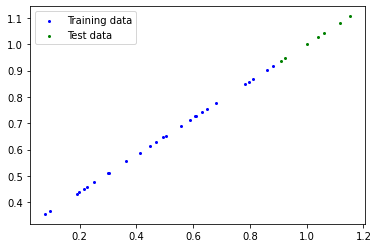

In [152]:
# Visualize the data
import matplotlib.pyplot as plt

def plot_data(pred=None):
  if pred is not None:
     plt.scatter(X_test, pred, c="r", s=4, label="Predictions")
  plt.scatter(X_train, y_train, c="b", s=4, label="Training data")
  plt.scatter(X_test, y_test, c="g", s=4, label="Test data")

  plt.legend()

plot_data()

Build a Model

In [156]:

class LinearRegressionModel(nn.Module): 
  def __init__(self):
    super().__init__() 
    self.layer = nn.Linear(1,1)
  def forward(self, x):
    return self.layer(x)

In [157]:
model = LinearRegressionModel()

In [158]:
# Make predictions with model
with torch.inference_mode():
    pred = model(X_test)

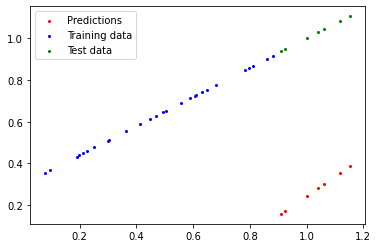

In [155]:
plot_data(pred)

Train the model

- Define a loss function

In [164]:
loss_fn = nn.L1Loss()
# Define the optimizer
optmizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [166]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float))

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 1.6990548372268677 | MAE Test Loss: 2.5713589191436768 
Epoch: 10 | MAE Train Loss: 1.6990548372268677 | MAE Test Loss: 2.5713589191436768 
Epoch: 20 | MAE Train Loss: 1.6990548372268677 | MAE Test Loss: 2.5713589191436768 
Epoch: 30 | MAE Train Loss: 1.6990548372268677 | MAE Test Loss: 2.5713589191436768 
Epoch: 40 | MAE Train Loss: 1.6990548372268677 | MAE Test Loss: 2.5713589191436768 
Epoch: 50 | MAE Train Loss: 1.6990548372268677 | MAE Test Loss: 2.5713589191436768 
Epoch: 60 | MAE Train Loss: 1.6990548372268677 | MAE Test Loss: 2.5713589191436768 
Epoch: 70 | MAE Train Loss: 1.6990548372268677 | MAE Test Loss: 2.5713589191436768 
Epoch: 80 | MAE Train Loss: 1.6990548372268677 | MAE Test Loss: 2.5713589191436768 
Epoch: 90 | MAE Train Loss: 1.6990548372268677 | MAE Test Loss: 2.5713589191436768 
Epoch: 100 | MAE Train Loss: 1.6990548372268677 | MAE Test Loss: 2.5713589191436768 
Epoch: 110 | MAE Train Loss: 1.6990548372268677 | MAE Test Loss: 2.571358919

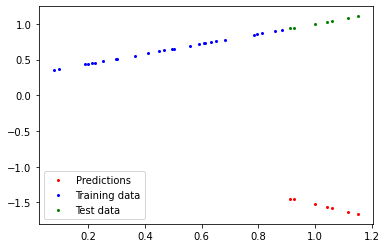

In [163]:
# Make predictions with model
with torch.inference_mode():
    pred = model(X_test)

plot_data(pred)